# Importing libraries and loading data

In [23]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn import preprocessing
from datetime import datetime as dt
from tensorflow.python import keras 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from IPython.display import IFrame
import ipywidgets as widgets
from sklearn.preprocessing import MinMaxScaler
from utils import *
import datetime

# Loading model

File already processed.
(1451, 47)
We have removed 113 outliers tuples (which is 7.787732598208132 % of total).
(1338, 28)
(1338, 1)


/home/luis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 27)                756       
_________________________________________________________________
dense_1 (Dense)              (None, 14)                392       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 15        
Total params: 1,163
Trainable params: 1,163
Non-trainable params: 0
_________________________________________________________________
1338/1338 [==============================] - 0s 159us/sample - loss: 0.0495 - mean_squared_error: 0.0495 - mean_absolute_error: 0.1782
[[0.31525847]
 [0.34605834]
 [0.30789405]
 ...
 [0.09596294]
 [0.17310393]
 [0.02796617]]
MSE: 64.15151791879757
MAE: 6.4146734679671855


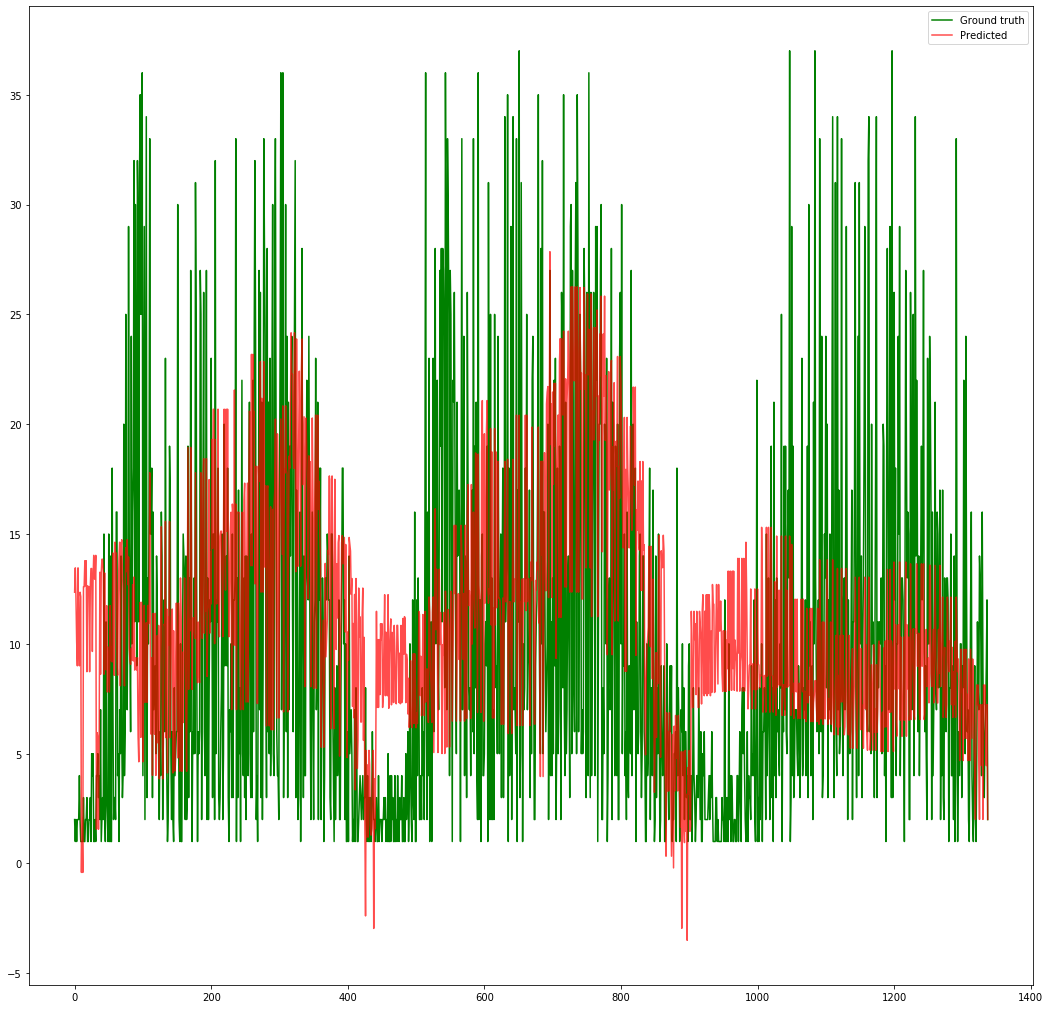

In [9]:
update_one_hot_data('./data/combined_data_22-jun.tsv','./data/combined_data_22-jun_one_hot_data.tsv')
df_new_data = pd.read_csv('./data/combined_data_22-jun_one_hot_data.tsv',
                 sep='\t',
                 header=0)
start_size=df_new_data.shape[0]
print(df_new_data.shape)
df_new_data = remove_outlier(df_new_data, "bike_count")
print("We have removed "+str(start_size-df_new_data.shape[0])+" outliers tuples (which is "+str((start_size-df_new_data.shape[0])/start_size*100)+" % of total).")
df_new_data=remove_features(df_new_data)    
df_new_data.set_index('timestamp_from', inplace=True)
df_new_data = df_new_data.sort_values(by=['timestamp_from'])
print(df_new_data.shape)


#set bike_count as Y
df_y = df_new_data.bike_count
df_x = df_new_data.drop(columns="bike_count")


#Normalization
x = df_x.values
y = df_y.values.reshape(-1, 1)
print(y.shape)
x_scaler = preprocessing.MinMaxScaler()
x_normalized = x_scaler.fit_transform(x)

y_scaler = preprocessing.MinMaxScaler()
y_normalized = y_scaler.fit_transform(y)

x_in = pd.DataFrame(x_normalized)
y_in = pd.DataFrame(y_normalized)




new_model = keras.models.load_model('./model/model-23-jun.bin')
new_model.summary()
evaluate_model_and_show_graph(x_in,y_in,new_model,y_scaler)


# Insert map

In [25]:
if not os.path.isfile('./map/bike_Brussels-points-map.html'):
    from map.generate_map import GENERATE_MAP_MAIN_FUNCTION
    GENERATE_MAP_MAIN_FUNCTION()
IFrame(src='./map/bike_Brussels-points-map.html',width=900,height=600)


# Select calendar

In [10]:
print("Select a start and end date")
start_date=datetime.datetime.now()
end_date=datetime.datetime.now()
@widgets.interact(start=widgets.DatePicker(),value='2019-06-19')
def foo(start=datetime.datetime.now()):
    global start_date
    start_date=start
    return str(start)
@widgets.interact(end=widgets.DatePicker())
def foo2(end=datetime.datetime.now()):
    global end_date
    end_date=end
    return str(end)

Select a start and end date


interactive(children=(DatePicker(value=None, description='start'), Output()), _dom_classes=('widget-interact',…

interactive(children=(DatePicker(value=None, description='end'), Output()), _dom_classes=('widget-interact',))

# Gather information

In [11]:
if start_date ==None or end_date==None:
    print("You need to set a start and end date")
else:
    if start_date==end_date:
        print("The dates must be different.")
    else:
        obtain_next_dates_data(start_date,end_date)


https://api.aerisapi.com/forecasts/50.82448,4.393893?from=1561500000&to=1561586400&filter=1hr&client_id=6mzRG6y1n6A6Dy3lQXRPT&client_secret=UP3GNV20hMBGP5CLnzyO8SSt51HpX0qSKeNEuEBx
https://api.aerisapi.com/forecasts/50.84337,4.378814?from=1561500000&to=1561586400&filter=1hr&client_id=6mzRG6y1n6A6Dy3lQXRPT&client_secret=UP3GNV20hMBGP5CLnzyO8SSt51HpX0qSKeNEuEBx
https://api.aerisapi.com/forecasts/50.84048,4.34001?from=1561500000&to=1561586400&filter=1hr&client_id=6mzRG6y1n6A6Dy3lQXRPT&client_secret=UP3GNV20hMBGP5CLnzyO8SSt51HpX0qSKeNEuEBx
https://api.aerisapi.com/forecasts/50.88185,4.373961?from=1561500000&to=1561586400&filter=1hr&client_id=6mzRG6y1n6A6Dy3lQXRPT&client_secret=UP3GNV20hMBGP5CLnzyO8SSt51HpX0qSKeNEuEBx
https://api.aerisapi.com/forecasts/50.8392,4.400259?from=1561500000&to=1561586400&filter=1hr&client_id=6mzRG6y1n6A6Dy3lQXRPT&client_secret=UP3GNV20hMBGP5CLnzyO8SSt51HpX0qSKeNEuEBx
https://api.aerisapi.com/forecasts/50.85363,4.34124?from=1561500000&to=1561586400&filter=1hr&clie

# Predict

In [22]:
update_one_hot_data('./data/next_dates_data.tsv','./data/next_dates_data_one_hot_data.tsv')
df_next_days_data = pd.read_csv('./data/next_dates_data_one_hot_data.tsv',
                 sep='\t',
                 header=0)
start_size=df_next_days_data.shape
print(start_size)
df_next_days_data=remove_features(df_next_days_data)
df_next_days_data.set_index('timestamp_from', inplace=True)
df_next_days_data = df_next_days_data.sort_values(by=['timestamp_from'])
print(df_next_days_data.shape)

x_scaler = MinMaxScaler()

x_data=df_next_days_data.drop(columns="bike_count")
x_normalized = x_scaler.fit_transform(x_data)
x_in = pd.DataFrame(x_normalized)
bike_prediction = new_model.predict(x_in)



y_normalized = y_scaler.fit_transform(y)
predicted_values=y_scaler.inverse_transform(bike_prediction)
print(predicted_values.shape)

print(x_data)


File already processed.
(225, 47)
(225, 28)
(225, 1)
                latitude  longitude  temperature  humidity  time_window  Rain  \
timestamp_from                                                                  
1561500000      50.82448   4.393893           20        89            0     0   
1561500000      50.84357   4.378738           20        90            0     0   
1561500000      50.84048   4.340010           20        90            0     0   
1561500000      50.82029   4.430121           20        89            0     0   
1561500000      50.88185   4.373961           20        90            0     0   
1561500000      50.84337   4.378814           20        90            0     0   
1561500000      50.85363   4.341240           20        90            0     0   
1561500000      50.83920   4.400259           20        89            0     0   
1561500000      50.82284   4.387441           20        89            0     0   
1561503600      50.83920   4.400259           19        

/home/luis/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/luis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
